# Stress Savior

## Group Member:
| Name | Matric Number | Occ |
| --- | --- | --- |
| Celine Ong Zi Ying | 22004878 | 1 |
| Dominic Chong Rong Yau | 22004881 | 1 |
| Mooi Kai Jun | 22004744 | 1 |
| Lye Xin Tian | 22004853 | 4 |
| Kew Wei Ming | 22004821 | 1 |

## Problem Statement
Nowadays, many people are busy on their works until they don't know whether they are stress or not. Especially university students, they are busy with thier assignments and projects until burning midnight oil or even skipping meal. All these factors can be used to determine the stress level of a person.

# Data Preparation & Analysis

In [1]:
# Import essential packages required
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
# Importing the data by uploading from GitHub
!git clone https://github.com/KewWM/WIA-1006

data = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/KewWM/WIA-1006/main/Stress%20Savior/StressLevel.csv"))

Cloning into 'WIA-1006'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 23 (delta 2), reused 23 (delta 2), pack-reused 0
Unpacking objects: 100% (23/23), 6.15 MiB | 8.72 MiB/s, done.


In [3]:
# Check the head of the data
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [4]:
# Representing the number of rows and columns in the data
print('Data shape: ', data.shape)

Data shape:  (630, 9)


In [5]:
# Provides information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [6]:
# Description of data
data.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [7]:
# Checking number of unique rows in each feature

data.nunique().sort_values()

sl        5
sr.1    501
rr      626
t       626
lm      626
bo      626
rem     626
hr      626
sr      627
dtype: int64

In [8]:
# Checking null value
data.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

Text(0.5, 1.0, 'Pairplots for all the Feature')

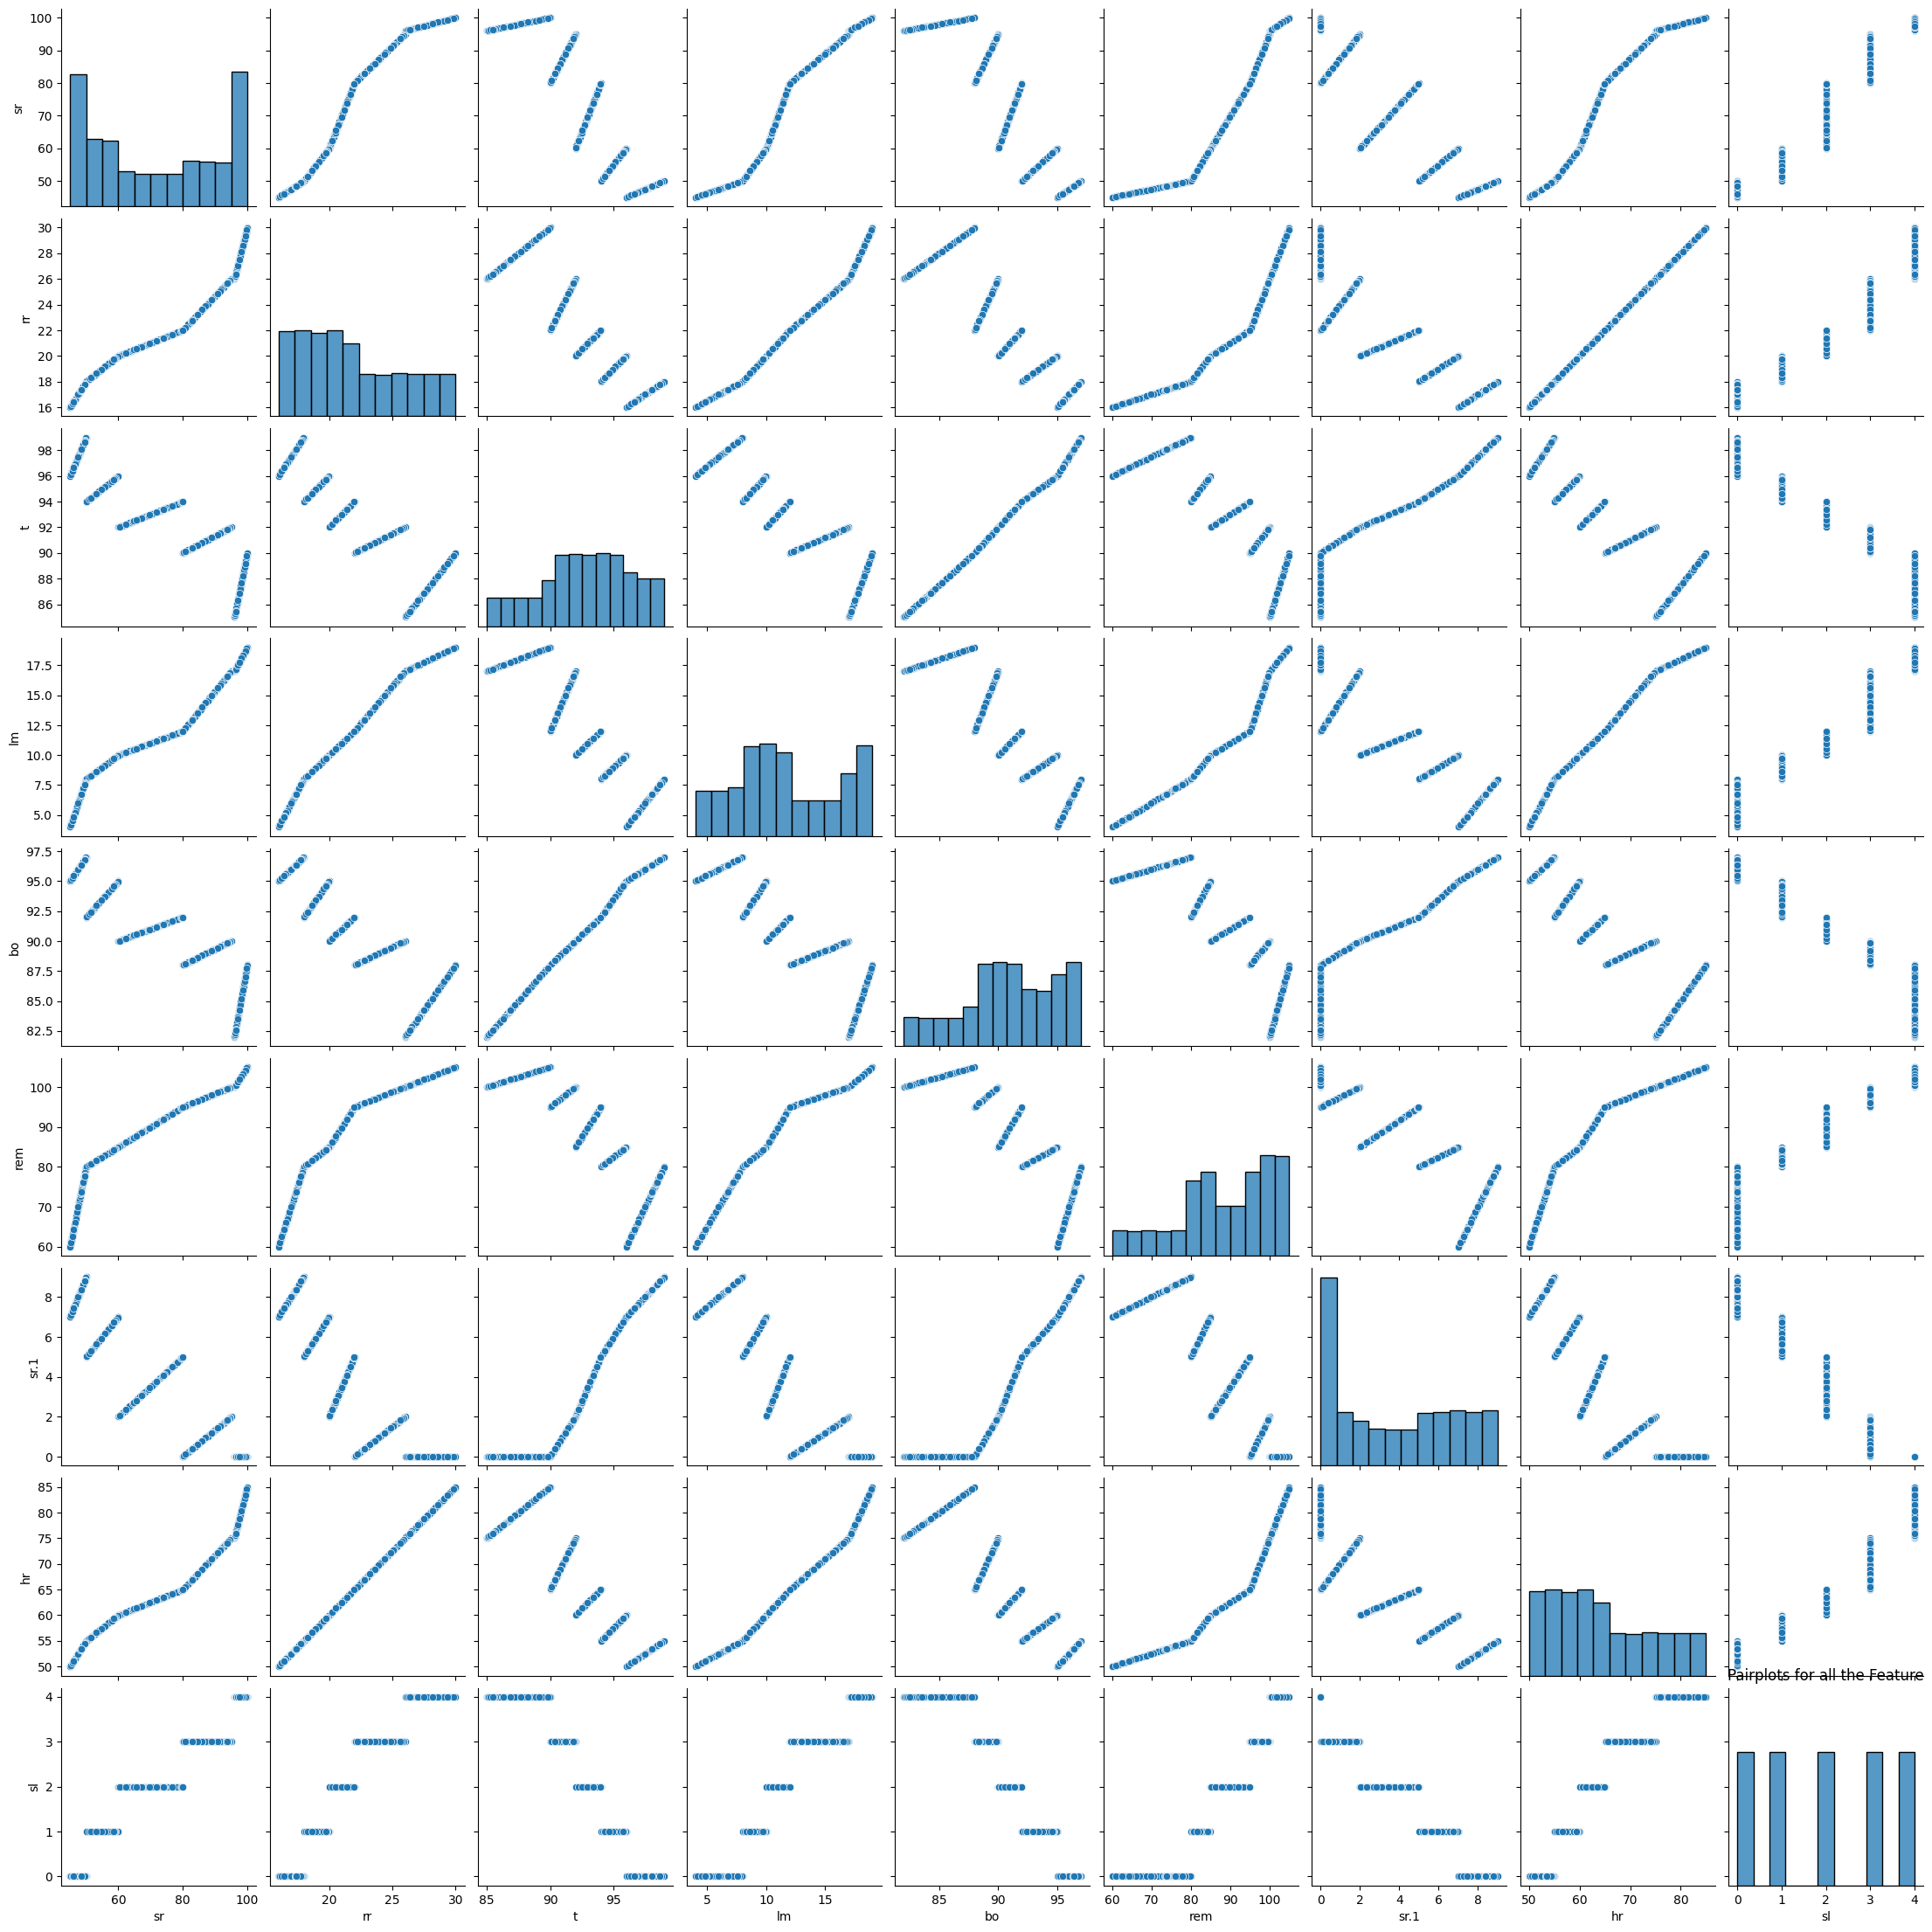

In [9]:
# Understanding the relationship between all the features

g = sns.pairplot(data)
plt.title('Pairplots for all the Feature')

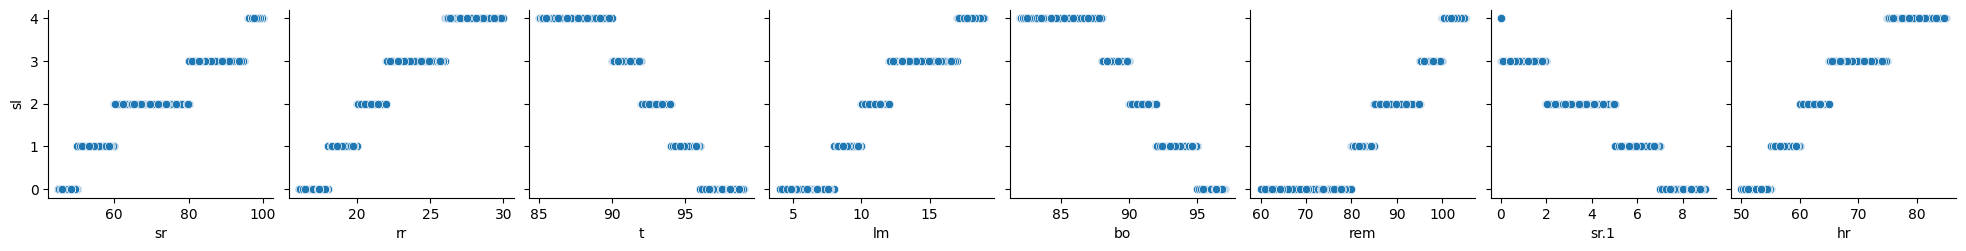

In [10]:
# Understanding the relationship between features and target variable
sns.pairplot(data, x_vars = data.drop(['sl'],axis=1).columns, y_vars = ['sl'])
plt.show()

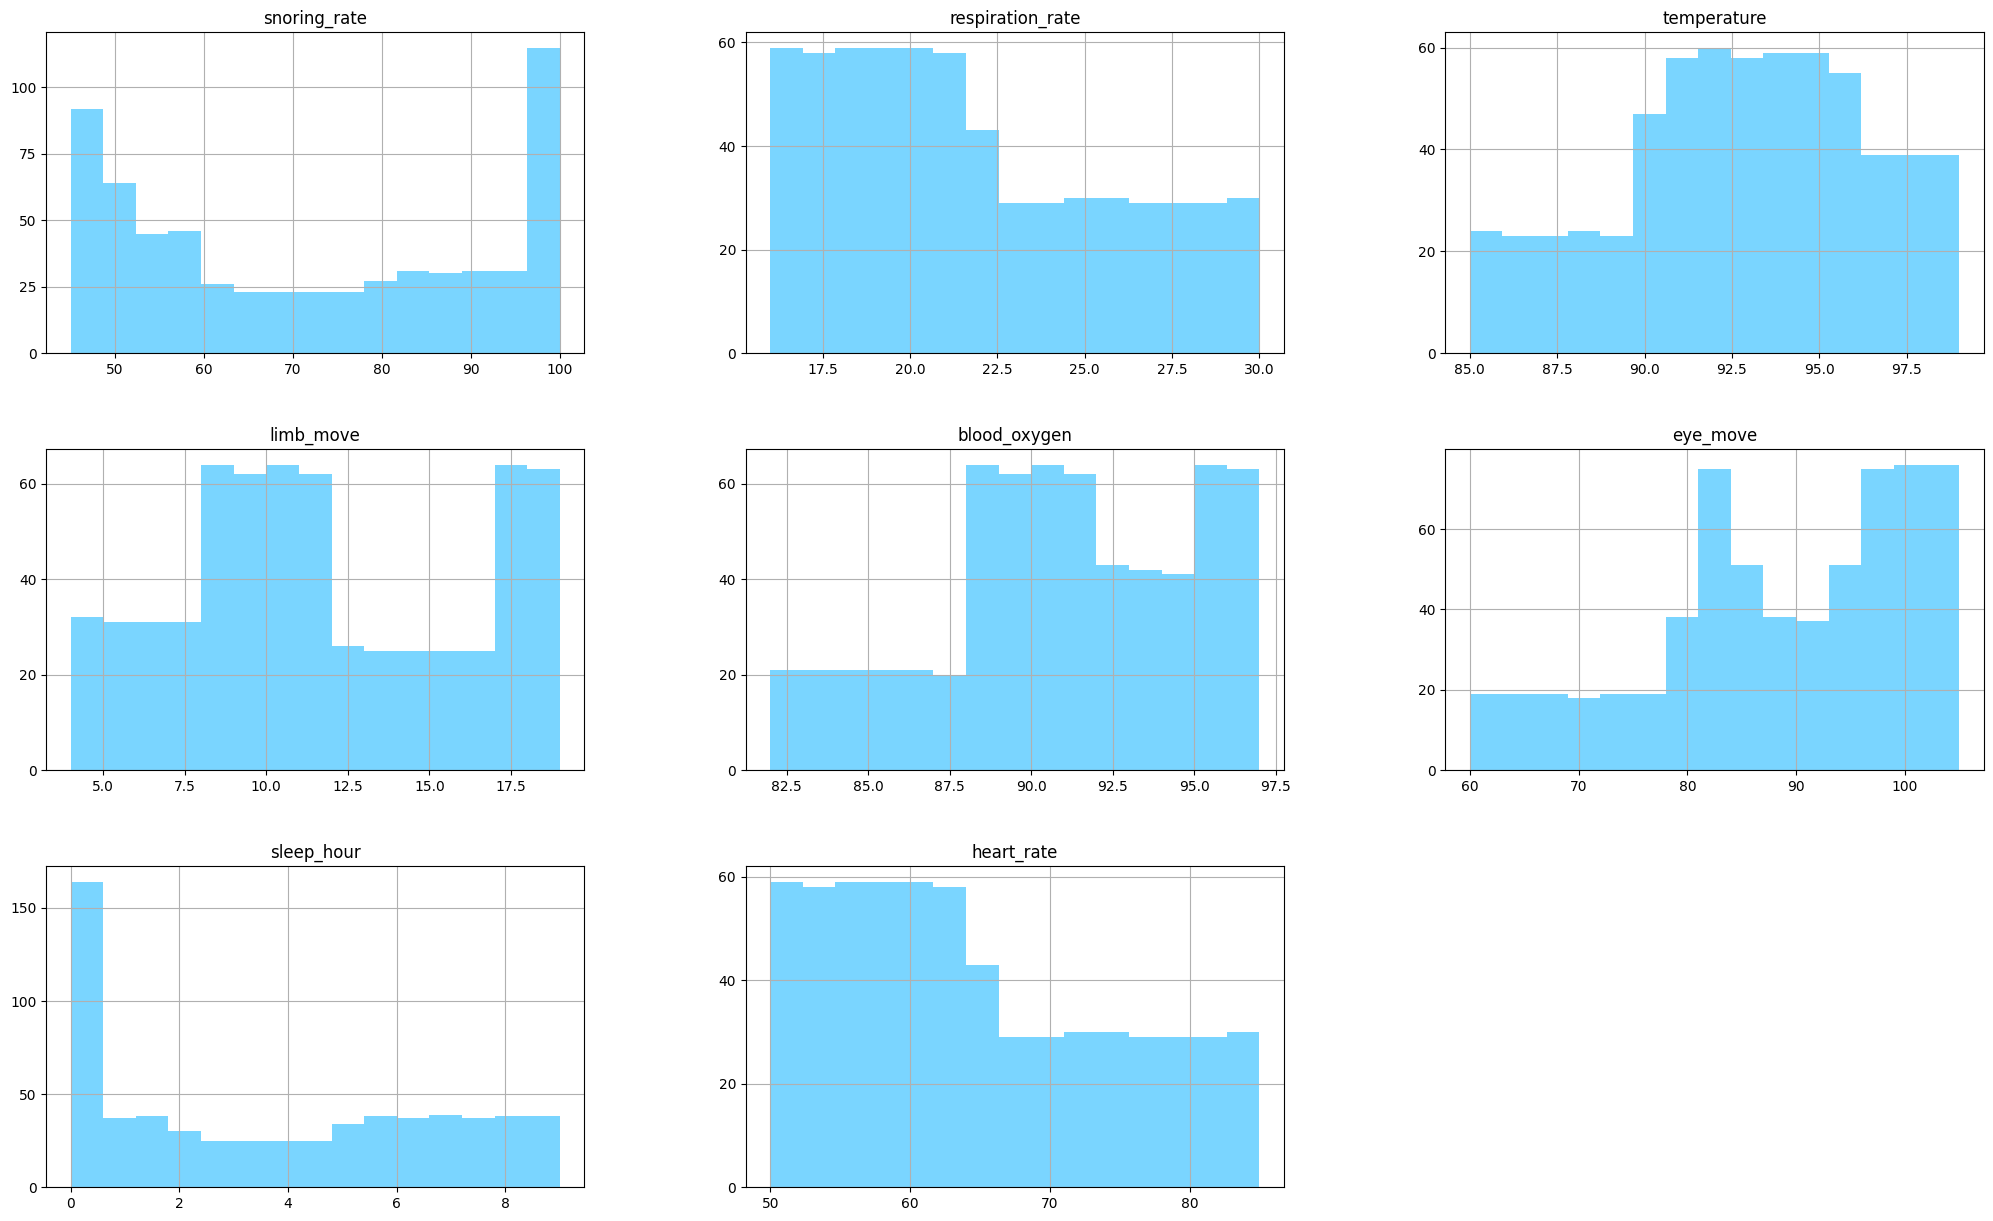

In [11]:
data.columns = ['snoring_rate', 'respiration_rate', 'temperature', 'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate', 'stress_level']
color = '#7AD5FF'
data2 = data.copy()
data2.drop('stress_level', axis = 1, inplace = True)
data2.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

Check the distribution of data from each column. 
1. Abnormal Distribution
* snoring_rate
* respiration_rate
* eye_move
* sleep_hour
* heart_rate
2. Normal Distribution
* temperature
* limb_move
* blood_oxygen

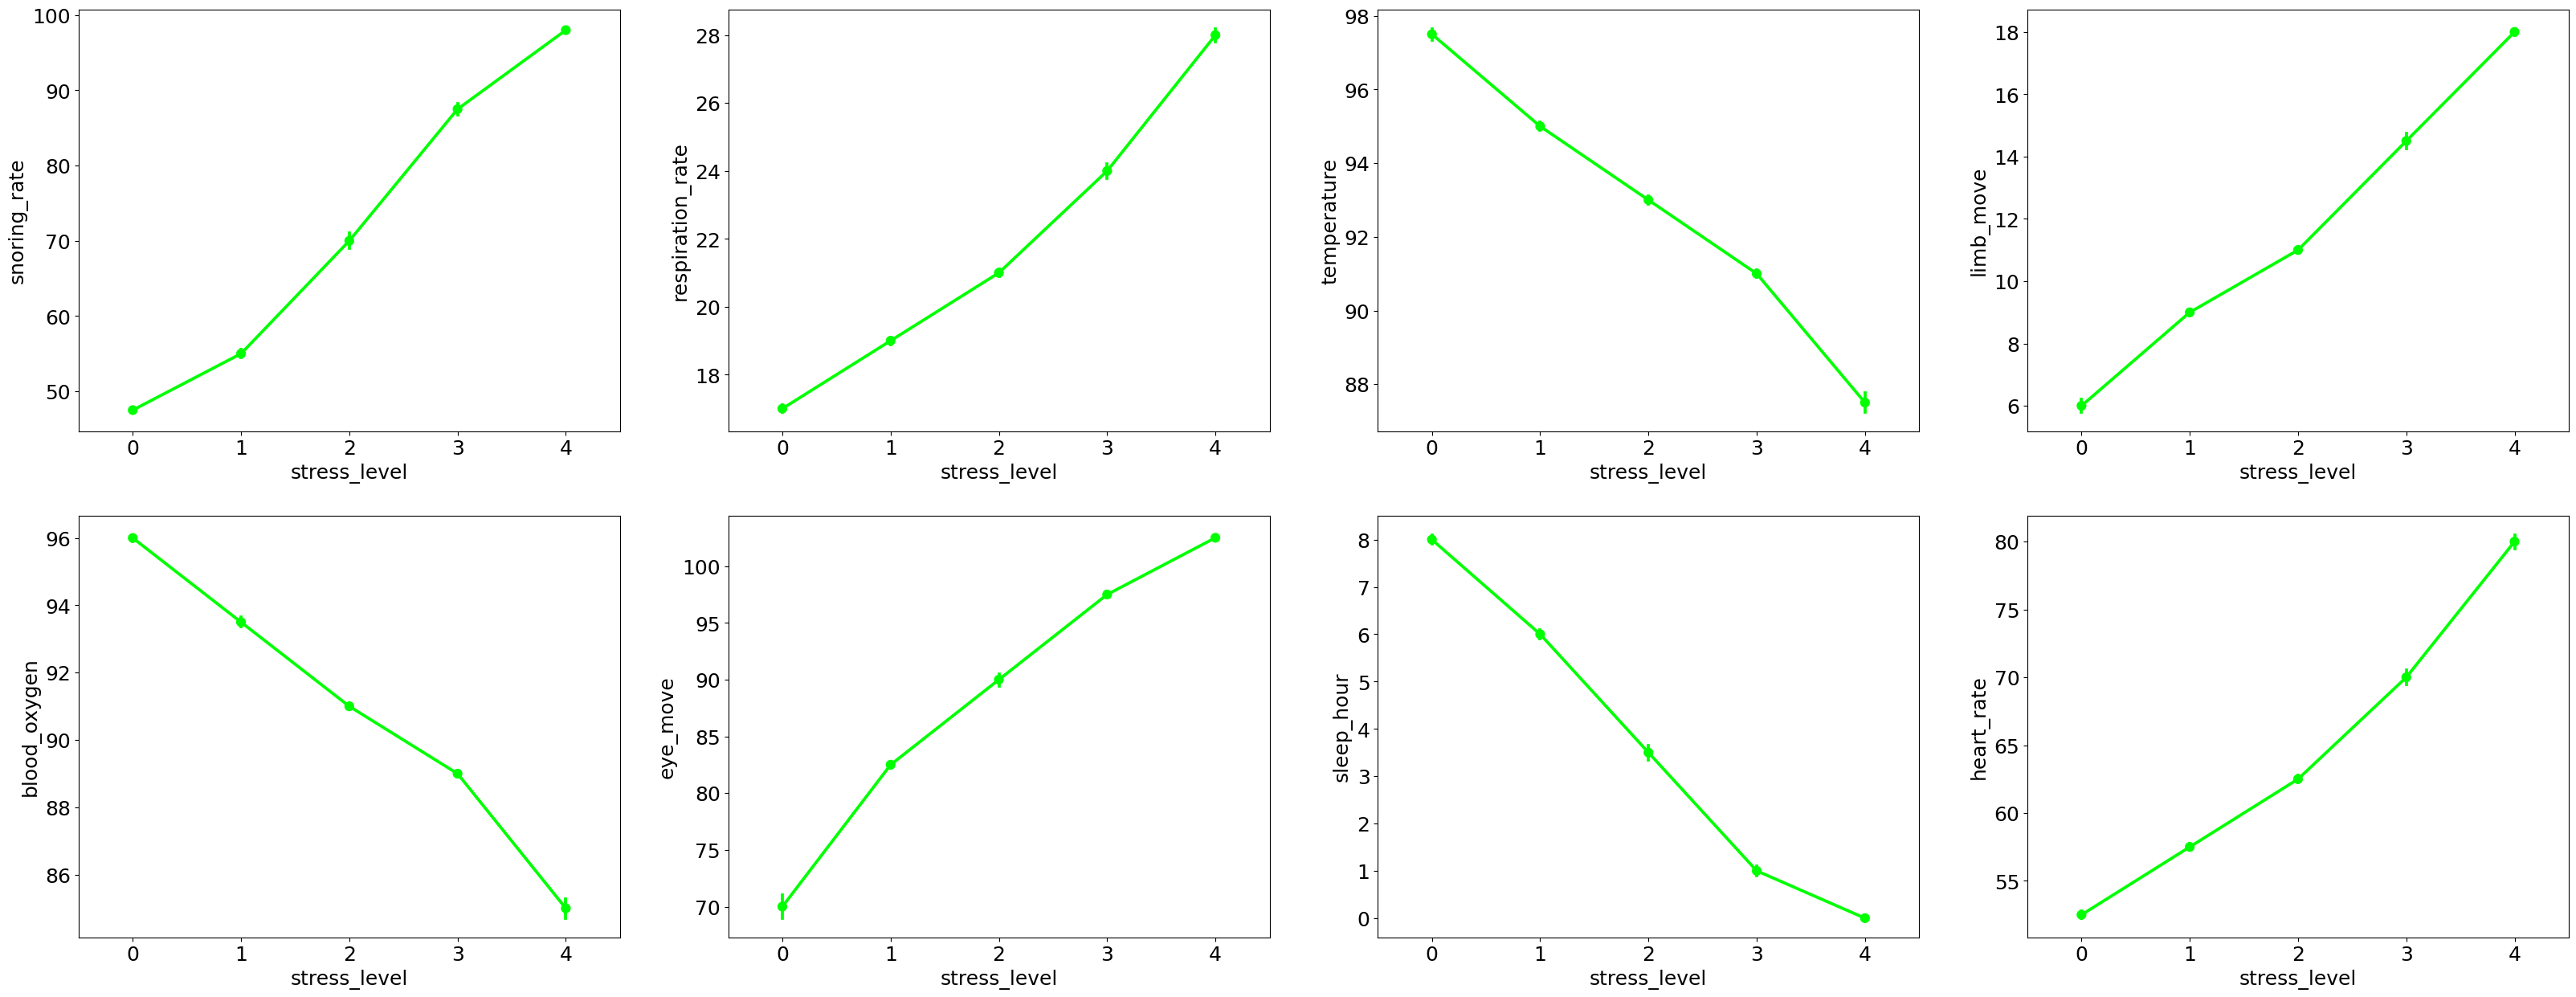

In [12]:
fig = plt.figure(figsize=(40, 15))
rows = 2
columns = 4
for i in range(len(data.columns[:-1])):
  fig.add_subplot(rows, columns, (i+1))
  img = sns.pointplot(x='stress_level',y=data.columns[i],data=data,color='lime')
plt.show()

Checking feature relationship with stress level. 

In the snoring_rate, respiration_rate, limb_movement, eye_move, and heart_rate features, the higher the value, the higher the stress level. 

In the temperature, blood_oxygen, and sleep_hour features, the lower the value, the higher the stress_level value.

<Figure size 1500x1000 with 0 Axes>

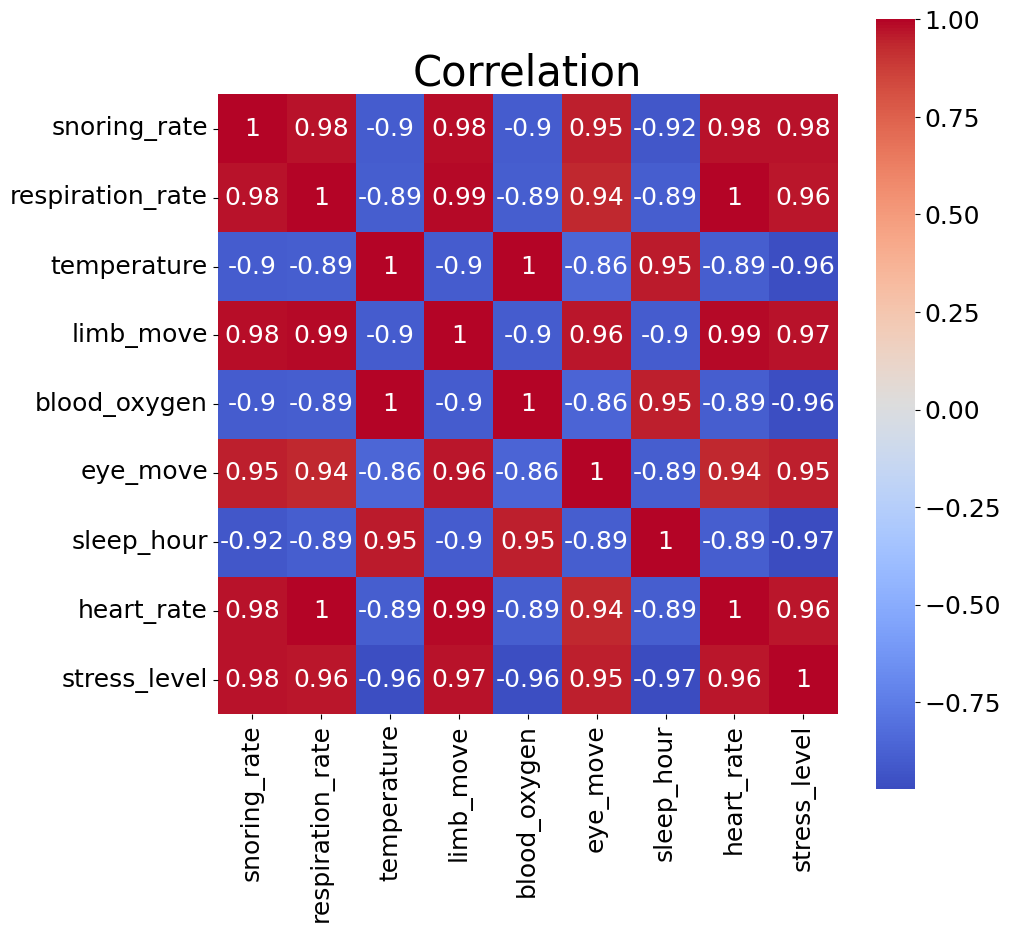

In [13]:
plt.figure(figsize = (15,10))

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, square=True, ax=ax, cmap='coolwarm')
plt.title('Correlation', fontsize = 30)

plt.show()

Check the correlation between features. it can be seen that all features have a very strong correlation. 

If the correlation value is equal to 1, then the correlation is positive. 

If the correlation value is equal to -1, then the correlation is negative.


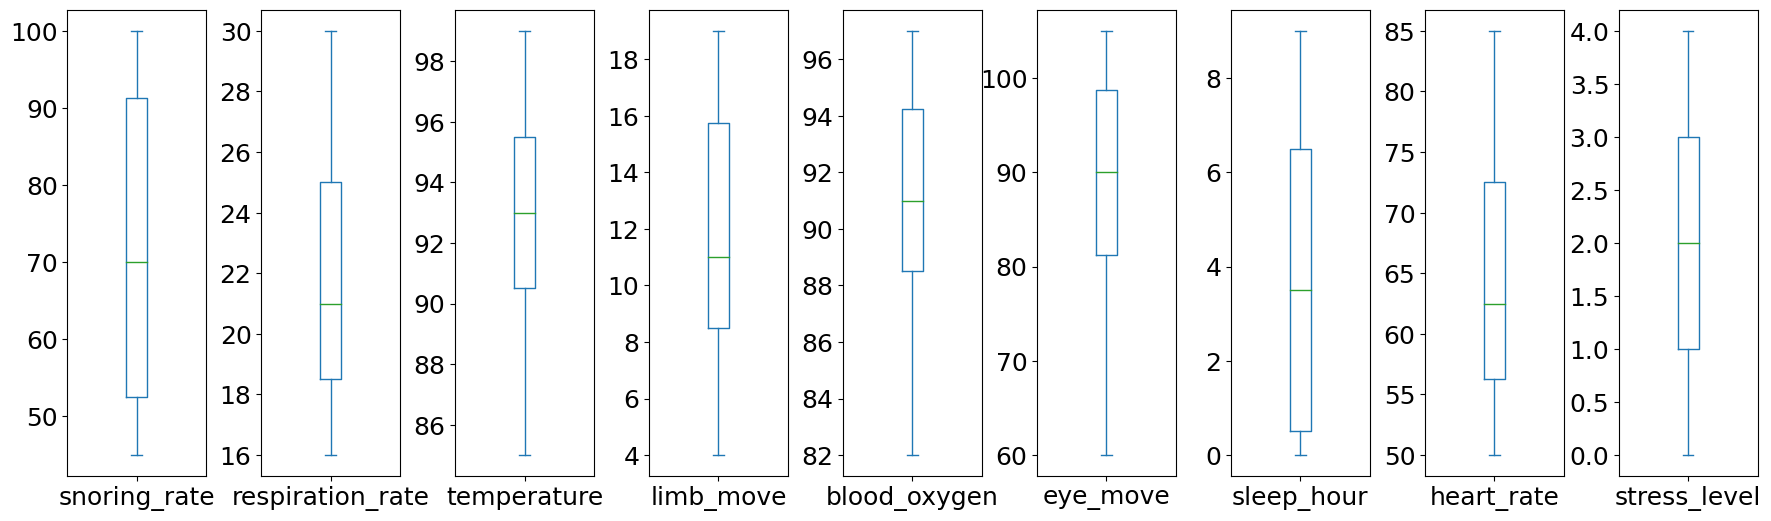

In [14]:
data.plot(kind='box', subplots=True, layout=(2,14),figsize=(14,14), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Check whether there are outlier data in each column in the data. It can be seen that there are no outliers in the data.

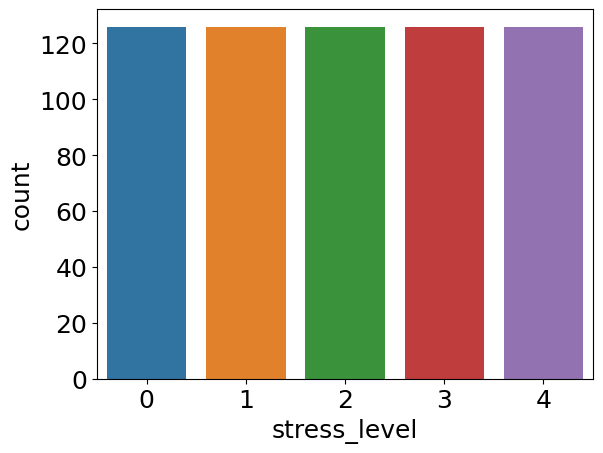

In [15]:
sns.countplot(x="stress_level", data = data)
plt.show()

See the target comparison or stress level in the data. It can be stated that the targets in the data are balanced so no sampling is necessary.

# Data Preprocessing

Since the data looks very good, we just continue doing normalization.

In [16]:
x = data.copy();
x.drop('stress_level', axis = 1, inplace = True)
y = data['stress_level']

Separating the output or target from the data, then the features of the data are entered in the x variable and the output/target of the data is entered in the y variable.

In [17]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = data.shape
datatemp = data.copy()
datatemp.drop_duplicates(inplace=True)

if datatemp.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset does not have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-datatemp.shape[0]}')
    
data = datatemp


Inference: The dataset does not have any duplicates


In [18]:
x = minmax_scale(x)

Normalize data features using minmax.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2,random_state=123)

Separating training data and testing data with a ratio of 80% : 20%.

In [20]:
# Showing data after pre processed
data_preprocessed = pd.DataFrame(x, columns = ['snoring_rate', 'respiration_rate', 'temperature', 'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate'])
data_preprocessed['stress_level'] = y
data_preprocessed.head(10)

,snoring_rate,respiration_rate,temperature,limb_move,blood_oxygen,eye_move,sleep_hour,heart_rate,stress_level
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0
5,0.216000,0.241143,0.741143,0.358400,0.804267,0.520889,0.708444,0.241143,1
6,0.036364,0.057143,0.871429,0.106667,0.920000,0.177778,0.866667,0.057143,0
7,0.090909,0.142857,1.000000,0.266667,1.000000,0.444444,1.000000,0.142857,0
8,0.005091,0.008000,0.797714,0.014933,0.874133,0.024889,0.790222,0.008000,0
9,0.191273,0.221714,0.721714,0.340267,0.777067,0.505778,0.678222,0.221714,1


# Model Development

# **Naive Bayes**

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
# Create a Naive Bayes model
model_bayes = GaussianNB()

# Train the classifier
model_bayes.fit(X_train, y_train)

GaussianNB()

In [23]:
# Make predictions on the testing data and training data
y_pred_bayes = model_bayes.predict(X_test)
y_trainpred = model_bayes.predict(X_train)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred_bayes)
accuracytrain = accuracy_score(y_train, y_trainpred)
print("Accuracy of testing :", accuracy1)
print('Accuracy of training: ', accuracytrain)

Accuracy of testing : 1.0
Accuracy of training:  1.0


In [24]:
print("Naive Bayes model metrics")
print("Error =", 1 - metrics.accuracy_score(y_test, y_pred_bayes))

Naive Bayes model metrics
Error = 0.0


In [25]:
# Generate a classification report
report = classification_report(y_test, y_pred_bayes)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# Define the number of folds for cross-validation
k = 5

# Perform cross-validation
cv = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(model_bayes, X_train, y_train, cv=cv, scoring='accuracy')

# Print the performance scores for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1} Accuracy: {score}")

# Calculate and print the average performance across all folds
average_accuracy = scores.mean()
print("Average Accuracy:", average_accuracy)


Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 1.0
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 1.0
Fold 5 Accuracy: 1.0
Average Accuracy: 1.0


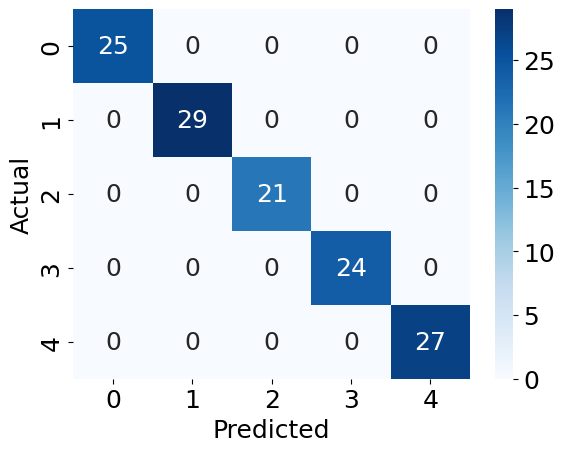

In [27]:
# Confusion matrix of Naive Bayes model
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
cm_display = sns.heatmap(cm_bayes, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

**Inference**

- Based on the confusion matrix of Naive Bayes model, there is only true positives and true negatives values. 
- This shows that the model is very good at predicting positive class and negative class.
- The accuracy of KFold shows that the Naive Bayes model is not overfitting or underfitting as all 5 folds accuracy are the same which is 1.0.


# **K-Nearest Neighbors (KNN)**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [29]:
#Split the data into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
#Perform hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
model_KNN = grid_search.best_estimator_
print(best_params)

{'n_neighbors': 3}


In [31]:
# Use the best hyperparameters in the model
model_KNN.set_params(**best_params) 

# Fit the model with the best hyperparameters on the training data
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
# Evaluate the model on the validation set
predict_val = model_KNN.predict(X_val)
accuracy_val = accuracy_score(y_val, predict_val)
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 1.0


In [33]:
# Compute the training accuracy
predict_train = model_KNN.predict(X_train)
accuracy_train = accuracy_score(y_train, predict_train)
print("Training Accuracy:", accuracy_train)

Training Accuracy: 1.0


In [34]:
# Evaluate the model on the test set
predict_test = model_KNN.predict(X_test)
accuracy_test = accuracy_score(y_test, predict_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 1.0


In [35]:
# Calculate error term
#n = len(y_test)
#error_term = np.sqrt((1 - r2) * np.var(y_test) / (n - X_test.shape[1] - 1))
print("KNN model metrics")
print("Error =", 1 - metrics.accuracy_score(y_test, predict_test))

KNN model metrics
Error = 0.0


In [36]:
# Generate a classification report
report = classification_report(y_test, predict_test)#predict_knn
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



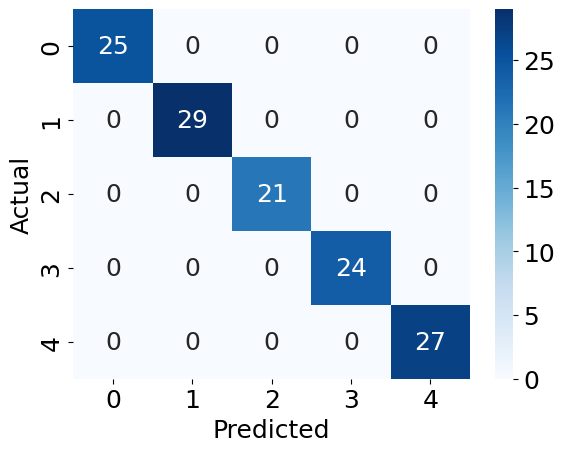

In [37]:
# Generate a confusion matrix
confusion_matrix = confusion_matrix(y_test, predict_test) #predict_knn
cm_display = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**There are not any False Positive (FP) and False Negative (FN) in the confusion matrix. The higher value of positive count along the diagonal represents the model is making correct prediction for those classes.**

### **To double confirm and ensure the model is not overfitting**

In [38]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model_KNN, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())
print("Standard Deviation of CV Accuracy:", scores.std())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
Standard Deviation of CV Accuracy: 0.0


1) The cross-validation scores are [1. 1. 1. 1. 1.], which means that model 
   **achieved a perfect accuracy of 1.0 (100%) on all five folds of the cross-validation.**

2) The mean CV accuracy is also 1.0, indicating that the average accuracy  
   across all folds is perfect. This means that the model is consistently performing well and correctly classifying the samples in each fold of the cross-validation.

3) The standard deviation of the CV accuracy is 0.0, meaning that there is no  
  variability in the accuracy scores across the different folds. This can happen when your model is consistently predicts with high accuracy.


Overall, these results indicate that your model is performing exceptionally well and consistently on the training data across multiple folds of cross-validation. However, we still need to check for the model's performance on unseen test data to ensure it can generalize well and not overfitting.

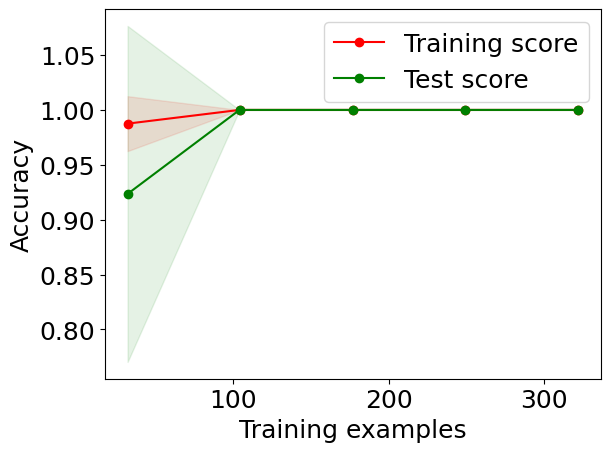

In [39]:
# To determine the model got overfit or not 
from sklearn.model_selection import learning_curve

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(model_KNN, X_train, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Test score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


**Based on the learning curve shown, we can know that:**

1) **High initial accuracy**: Both the training and test scores start at high 
   accuracies ( around 0.98 for training and around 0.97 for testing). This indicates that even with a small amount of data, the model is able to capture the patterns and perform well.

2) **Convergence**: 
   The fact that both the training and test scores reach a 
   plateau and remain the same suggests that the model has converged and is not improving significantly with additional training examples. This could indicate that the model has learned the underlying patterns in the data and has reached its maximum performance.

3) **Similar performance**: The fact that the training and test scores are  
     close to each other and remain the same suggests that the model is not overfitting or underfitting. It shows that the model is generalizing well to unseen data, as the performance on the test set is consistent with the performance on the training set.

4) **Reliability**: With a smaller standard deviation ((the shaded areas)), you 
     can have higher confidence in the model's accuracy estimates. The narrow range suggests that the model is stable and produces consistent results, which is desirable in terms of model evaluation and decision-making.

Overall, these learning curve characteristics indicate **a well-performing model with good generalization**. It suggests that your model has learned the data patterns effectively and is **not overfitting or underfitting**. 

# **Decision Trees**

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [41]:
# Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
# Given X test data to predict
y_pred = clf.predict(X_test)

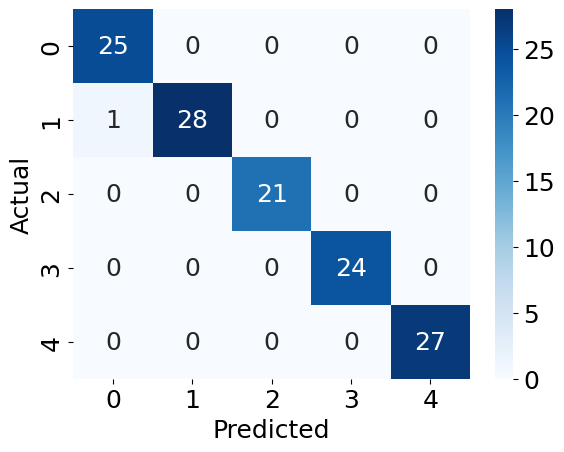

In [43]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred)
cm_display1 = sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
from sklearn.metrics import accuracy_score
# Test accuracy
accuracy3 = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy3)
print("Error =", 1 - metrics.accuracy_score(y_test, y_pred))

Test accuracy:  0.9920634920634921
Error = 0.007936507936507908


In [45]:
from sklearn.metrics import classification_report
# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



In [46]:
# X (features)
feature = (data.columns).drop("stress_level")
feature

Index(['snoring_rate', 'respiration_rate', 'temperature', 'limb_move',
       'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate'],
      dtype='object')

In [47]:
# Importance Features in DataFrame format
feature_importances = pd.DataFrame(clf.feature_importances_, index=feature).sort_values(0, ascending=True)
feature_importances

,0
respiration_rate,0.000000
temperature,0.000000
limb_move,0.000000
eye_move,0.000000
sleep_hour,0.000000
blood_oxygen,0.250424
heart_rate,0.258191
snoring_rate,0.491385


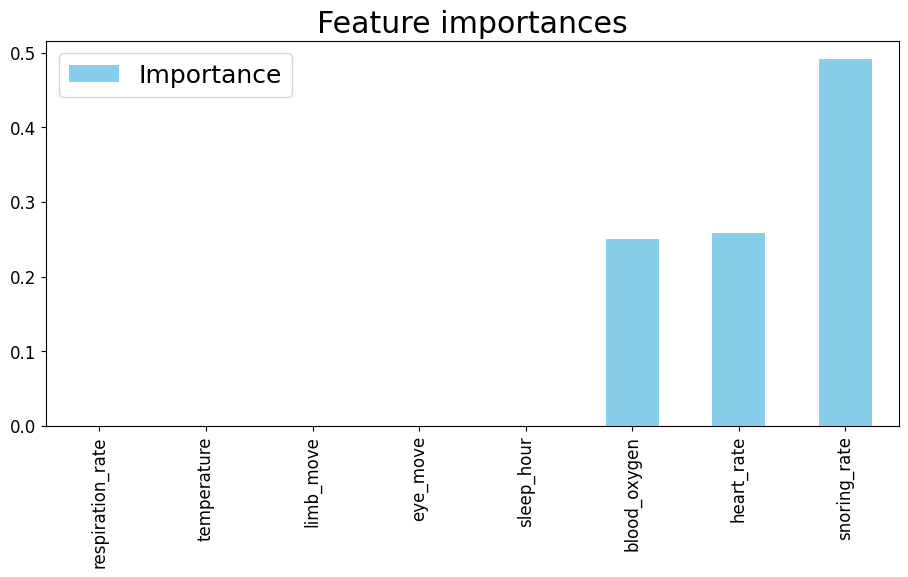

In [48]:
# Importance Features in Graph format
feature_importances.plot(kind='bar', title="Feature importances", figsize=(11,5), color='skyblue', fontsize = 12)
plt.legend(['Importance'])

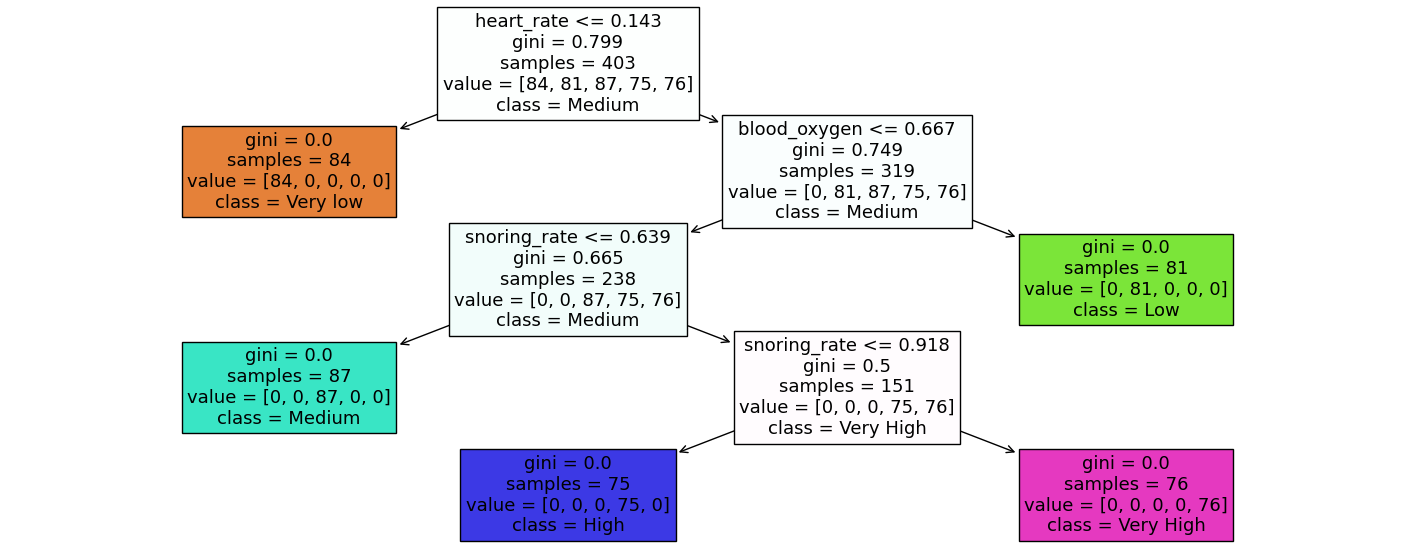

In [49]:
# Creating a decision tree
# The greater goes to the right, the lower goes to the left
# The value section is the class distribution
fig = plt.figure(figsize=(18,7))
tree = tree.plot_tree(clf, feature_names=feature, class_names={0:'Very low', 1:'Low', 2:'Medium', 3:'High', 4:"Very High"}, filled=True, fontsize=13)

In [50]:
# To check if the decision tree model is overfitting
from sklearn.model_selection import cross_val_score

# Evaluation on training set
train_score = clf.score(X_train, y_train)
print("Training accuraccy ->", train_score)

# Model evaluation on test set
print("\nTest accuracy ->", accuracy3)

# Model evaluation using cross-validation
print("\nCross Validation:")
cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy->", cv_score)
print("Average of accuracy ->", cv_score.mean())

Training accuraccy -> 1.0

Test accuracy -> 0.9920634920634921

Cross Validation:
Accuracy-> [0.96296296 0.98765432 0.97530864 0.9875     1.        ]
Average of accuracy -> 0.9826851851851851


## Explanation:

*   Training accuracy is 1 represents that the model has learned the training data perfectly.
*   By observing, training accuracy is slightly higher than the test accuracy and average accuracy of cross validation.
*   The test accuracy and average accuracy of cross validation are also considered high which mean the model is also quite good in unseen data too but still can be improved by using prepuning.
*   Hence, the model is **slightly overfitting**.



# **Hyperparameter tuning for Decision Tree**
**Using Grid Search with Cross-Validation**
###Pre-Pruning - a technique that refers to the early stopping of the growth of the decision tree.
1. Maximum depth
2. Minimum sample split
3. Minimum sample leaf
4. Maximum features
5. Criterion

GridsearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
# The hyperparameters being tuned are 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', and 'criterion'
# By tuning these hyperparameters, we can explore different combinations and find the optimal configuration that yields the best performance for decision tree model
# 640 times will be train
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Try different maximum depths
    'min_samples_split': [2, 5, 10,15],  # Try different minimum samples to split
    'min_samples_leaf': [1, 2, 4, 6],  # Try different minimum samples in a leaf
    'max_features': ['sqrt', 'log2', 0.5, 0.8],  # Try different maximum features
    'criterion': ['gini', 'entropy']  # Try different splitting criteria
}

# Create the decision tree model
dt_model_tune1 = DecisionTreeClassifier()

# Perform grid search
# The number of cross-validation folds is set to 15, meaning the data will be split into 15 parts, and the model will be trained and evaluated 15 times
# where each time it will be trained on 14 folds and evaluated on the remaining fold. 
# This process is repeated for each combination of hyperparameters specified in the parameter grid.
grid_search1 = GridSearchCV(dt_model_tune1, param_grid, cv=15, scoring='accuracy')

# Fit the grid search to find the best hyperparameters
# This step performs an exhaustive search over the specified parameter grid, 
# fitting the decision tree model with different combinations of hyperparameters and evaluating their performance using cross-validation.
grid_search1.fit(X_train, y_train)

# Get the best hyperparameters
best_params1 = grid_search1.best_params_
print("Best Hyperparameters:", best_params1)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15}


In [52]:
from tabulate import tabulate

# Create a dictionary with the best hyperparameters
best_hyperparameters = grid_search1.best_params_

# Convert the dictionary to a list of lists
hyperparameters_list = [[param, value] for param, value in best_hyperparameters.items()]

# Display the best hyperparameters using tabulate
print('Best hyperparameter: ')
print(tabulate(hyperparameters_list, headers=["Hyperparameter", "Value"], tablefmt="fancy_grid"))


Best hyperparameter: 
╒═══════════════════╤═════════╕
│ Hyperparameter    │ Value   │
╞═══════════════════╪═════════╡
│ criterion         │ gini    │
├───────────────────┼─────────┤
│ max_depth         │ 15      │
├───────────────────┼─────────┤
│ max_features      │ sqrt    │
├───────────────────┼─────────┤
│ min_samples_leaf  │ 1       │
├───────────────────┼─────────┤
│ min_samples_split │ 15      │
╘═══════════════════╧═════════╛


In [53]:
score_df = pd.DataFrame(grid_search1.cv_results_)
score_df.head()

# the result of the grid search

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001452,0.000430,0.001358,0.001594,gini,None,sqrt,1,2,"{'criterion': 'gini', 'max_depth': None, 'max_...",...,1.0,1.0,0.962963,1.0,1.0,1.0,1.0,0.980247,0.022898,424
1,0.001362,0.000475,0.000900,0.000460,gini,None,sqrt,1,5,"{'criterion': 'gini', 'max_depth': None, 'max_...",...,1.0,1.0,0.962963,1.0,1.0,1.0,1.0,0.985185,0.022630,83
2,0.001388,0.000346,0.000814,0.000152,gini,None,sqrt,1,10,"{'criterion': 'gini', 'max_depth': None, 'max_...",...,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,0.982716,0.022898,248
3,0.001072,0.000030,0.000692,0.000091,gini,None,sqrt,1,15,"{'criterion': 'gini', 'max_depth': None, 'max_...",...,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,0.982716,0.022898,248
4,0.001117,0.000168,0.000725,0.000246,gini,None,sqrt,2,2,"{'criterion': 'gini', 'max_depth': None, 'max_...",...,1.0,1.0,0.962963,1.0,1.0,1.0,1.0,0.985185,0.022630,83


In [54]:
# Train the decision tree model with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params1)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
# To assess the performance and generalization ability of the trained model on unseen data.
y_pred_dt1 = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt1)
print("Accuracy on testing data: ", accuracy)
print("Error : ", 1 - metrics.accuracy_score(y_test, y_pred_dt1))

Accuracy on testing data:  0.9841269841269841
Error :  0.015873015873015928


In [55]:
y_pred_dt1

array([4, 1, 2, 0, 0, 3, 3, 4, 3, 4, 1, 0, 2, 1, 3, 0, 2, 1, 4, 4, 1, 1,
       3, 2, 1, 1, 1, 0, 4, 2, 4, 3, 2, 2, 4, 0, 4, 3, 4, 4, 4, 3, 4, 2,
       3, 1, 0, 1, 1, 4, 2, 4, 3, 1, 3, 1, 4, 0, 0, 0, 1, 0, 1, 1, 0, 3,
       1, 0, 3, 4, 0, 1, 4, 2, 1, 2, 4, 3, 3, 1, 0, 3, 0, 1, 0, 2, 4, 3,
       2, 0, 2, 1, 3, 0, 3, 1, 0, 2, 1, 4, 0, 1, 0, 2, 1, 2, 4, 2, 4, 2,
       3, 2, 4, 3, 3, 0, 3, 2, 3, 1, 3, 0, 0, 4, 4, 0])

As compare to the result **before** perform hyperparameter tuning, 
   
    Accuracy:  0.9841269841269841
    Error : 0.015873015873015928
  
and the result **after** performed hyperparameter tuning, 

    Accuracy :  0.9920634920634921
    Error :  0.007936507936507908
the accuracy have been improved and the error is decreasing. 
\
This mean that the model have been improve and it able to generate to new, unseen data and to estimate its performance on a person's stress level.

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        21
           3       0.96      1.00      0.98        24
           4       1.00      0.96      0.98        27

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126

Confusion Matrix:


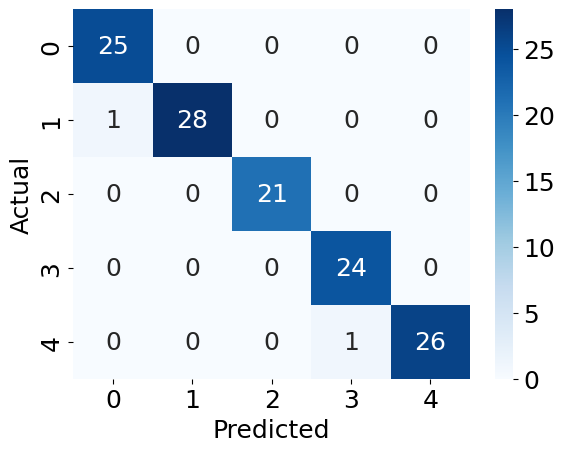

In [56]:
# Generate a classification report
report = classification_report(y_test, y_pred_dt1)
print("Classification Report:\n", report)

# Confusion matrix of Decision Tree model after perform tunning
# summarizes the performance of a classification model on a set of test data.
# It shows the counts of true positives, true negatives, false positives, and false negatives.
print("Confusion Matrix:")
tune_cm = confusion_matrix(y_test, y_pred_dt1)
cm_display = sns.heatmap(tune_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

We can observe that the there is only one prediction error in the confusion matrix, it indicates that the model has made a very low number of incorrect predictions. 
\
This suggests that the model has performed well overall and has achieve a high level of accuracy.

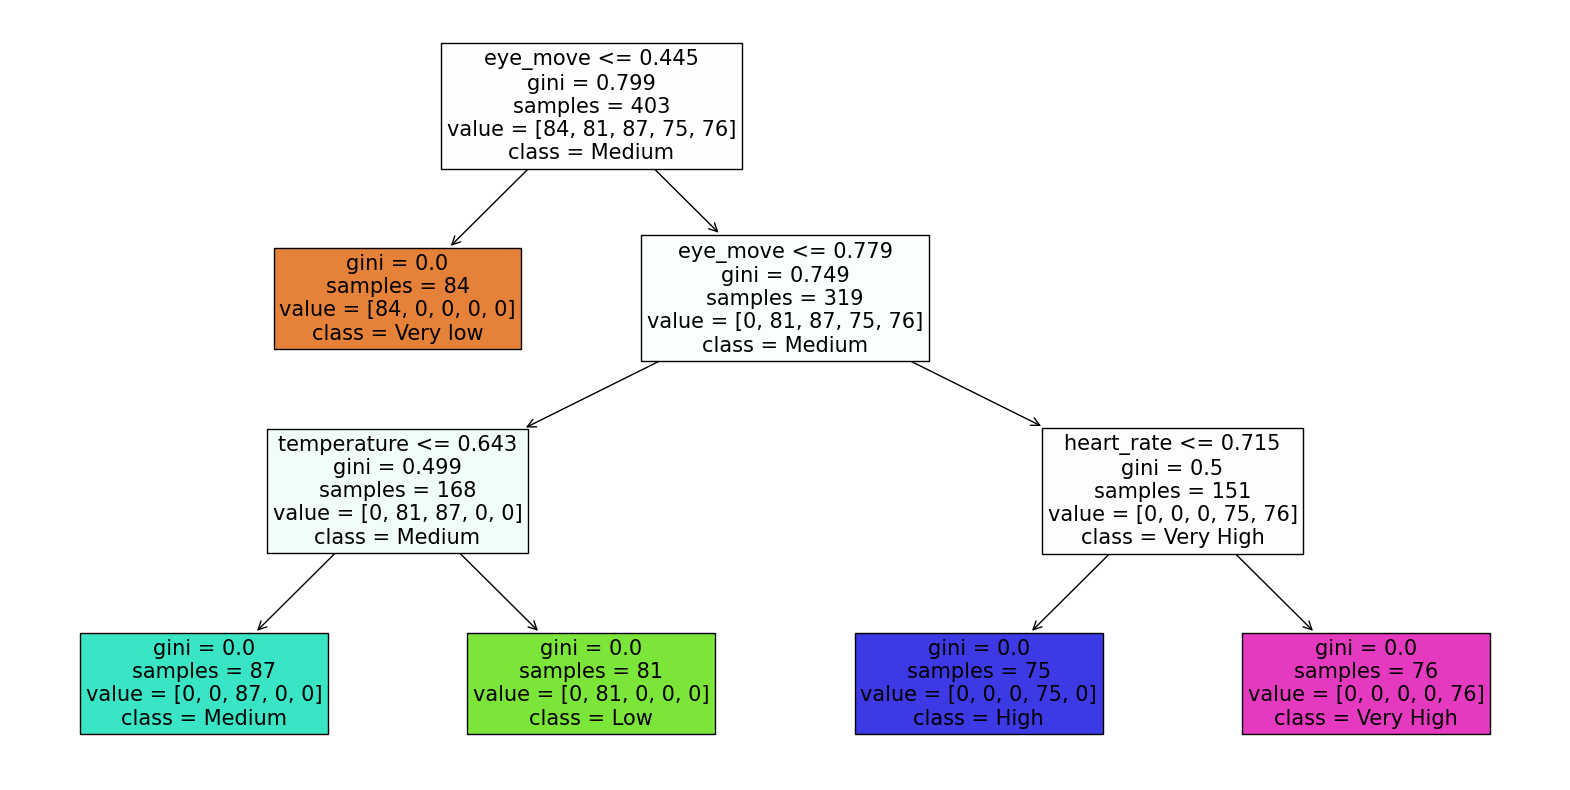

In [57]:
fig = plt.figure(figsize=(20,10))
tree = tree.plot_tree(best_model, feature_names=feature, class_names={0:'Very low', 1:'Low', 2:'Medium', 3:'High', 4: "Very High"}, filled=True, fontsize=15)

Even though after perform hyperparameter tuning for decision tree where the accuracy have been improve and the error is decreasing, the accuracy of Decision tree model is still lower than the accuracy of Naive Bayes and K-Nearest Neighbours.Therefore, the best model are Naive Bayes and K-Nearest Neighbours where they can predict well on a person's stress level compared with Decision Tree model